In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [19]:
!pwd

/Users/bytedance/go/src/github.com/skiplist-survey/visualize


In [20]:
df = pd.read_csv("./a.csv", header=None).dropna(axis=1).T

In [21]:
df.columns = df.iloc[0] 
df.drop(index=0, inplace=True)

In [22]:
df = df.set_index(df['iterations']).drop(columns="iterations")

In [23]:
df.columns

Index(['seanInserts', 'seanWorstInserts', 'seanRandomInserts', 'seanAvgSearch',
       'seanSearchEnd', 'seanDelete', 'seanWorstDelete', 'seanRandomDelete',
       'zhenjlInserts', 'zhenjlWorstInserts', 'zhenjlRandomInserts',
       'zhenjlAvgSearch', 'zhenjlSearchEnd', 'zhenjlDelete',
       'zhenjlWorstDelete', 'zhenjlRandomDelete', 'mtchavezInserts',
       'mtchavezWorstInserts', 'mtchavezRandomInserts', 'mtchavezAvgSearch',
       'mtchavezSearchEnd', 'mtchavezDelete', 'mtchavezWorstDelete',
       'mtchavezRandomDelete', 'huanduInserts', 'huanduWorstInserts',
       'huanduRandomInserts', 'huanduAvgSearch', 'huanduSearchEnd',
       'huanduDelete', 'huanduWorstDelete', 'huanduRandomDelete', 'colInserts',
       'colWorstInserts', 'colRandomInserts', 'colAvgSearch', 'colSearchEnd',
       'colDelete', 'colWorstDelete', 'colRandomDelete', 'ryszardInserts',
       'ryszardWorstInserts', 'ryszardRandomInserts', 'ryszardAvgSearch',
       'ryszardSearchEnd', 'ryszardDelete', 'ryszardW

In [24]:
def plot(regex=".*", save_name=".png"): 
    data = df.filter(regex=regex)
    sns.set_theme()
    fig = sns.relplot(
        data=data, kind="line",
    )
    fig.savefig(save_name)

In [25]:

def render_md(reg={}):
    fo = open("./png.md","w")
    fo.write("## Analysis Result Pns\n\n")
    for key in reg: 
        fo.write("#### {:s}\n\n".format(reg[key]))
        fo.write("![{:s}](./{:s})\n\n".format(reg[key], reg[key]))
    fo.close()

In [26]:
reg = {
    ".*RandomInserts":"RandomInserts.png",
    "^(?!.*Worst)(?!.*Random).*Inserts$": "Insert.png",
    "^.*WorstInserts$": "WorstInserts.png",
    
    ".*AvgSearch": "WorstSearch.png",
    ".*SearchEnd": "SearchEnd.png",
   
    "^(?!.*Worst)(?!.*Random).*Delete$": "Delete.png",
    ".*WorstDelete": "WorstDelete.png",
    ".*RandomDelete": "RandomDelete.png",
   
}

In [27]:
render_md(reg)
# you can use "@@include[my-file.md](includes/my-file.md)" to include the png.md

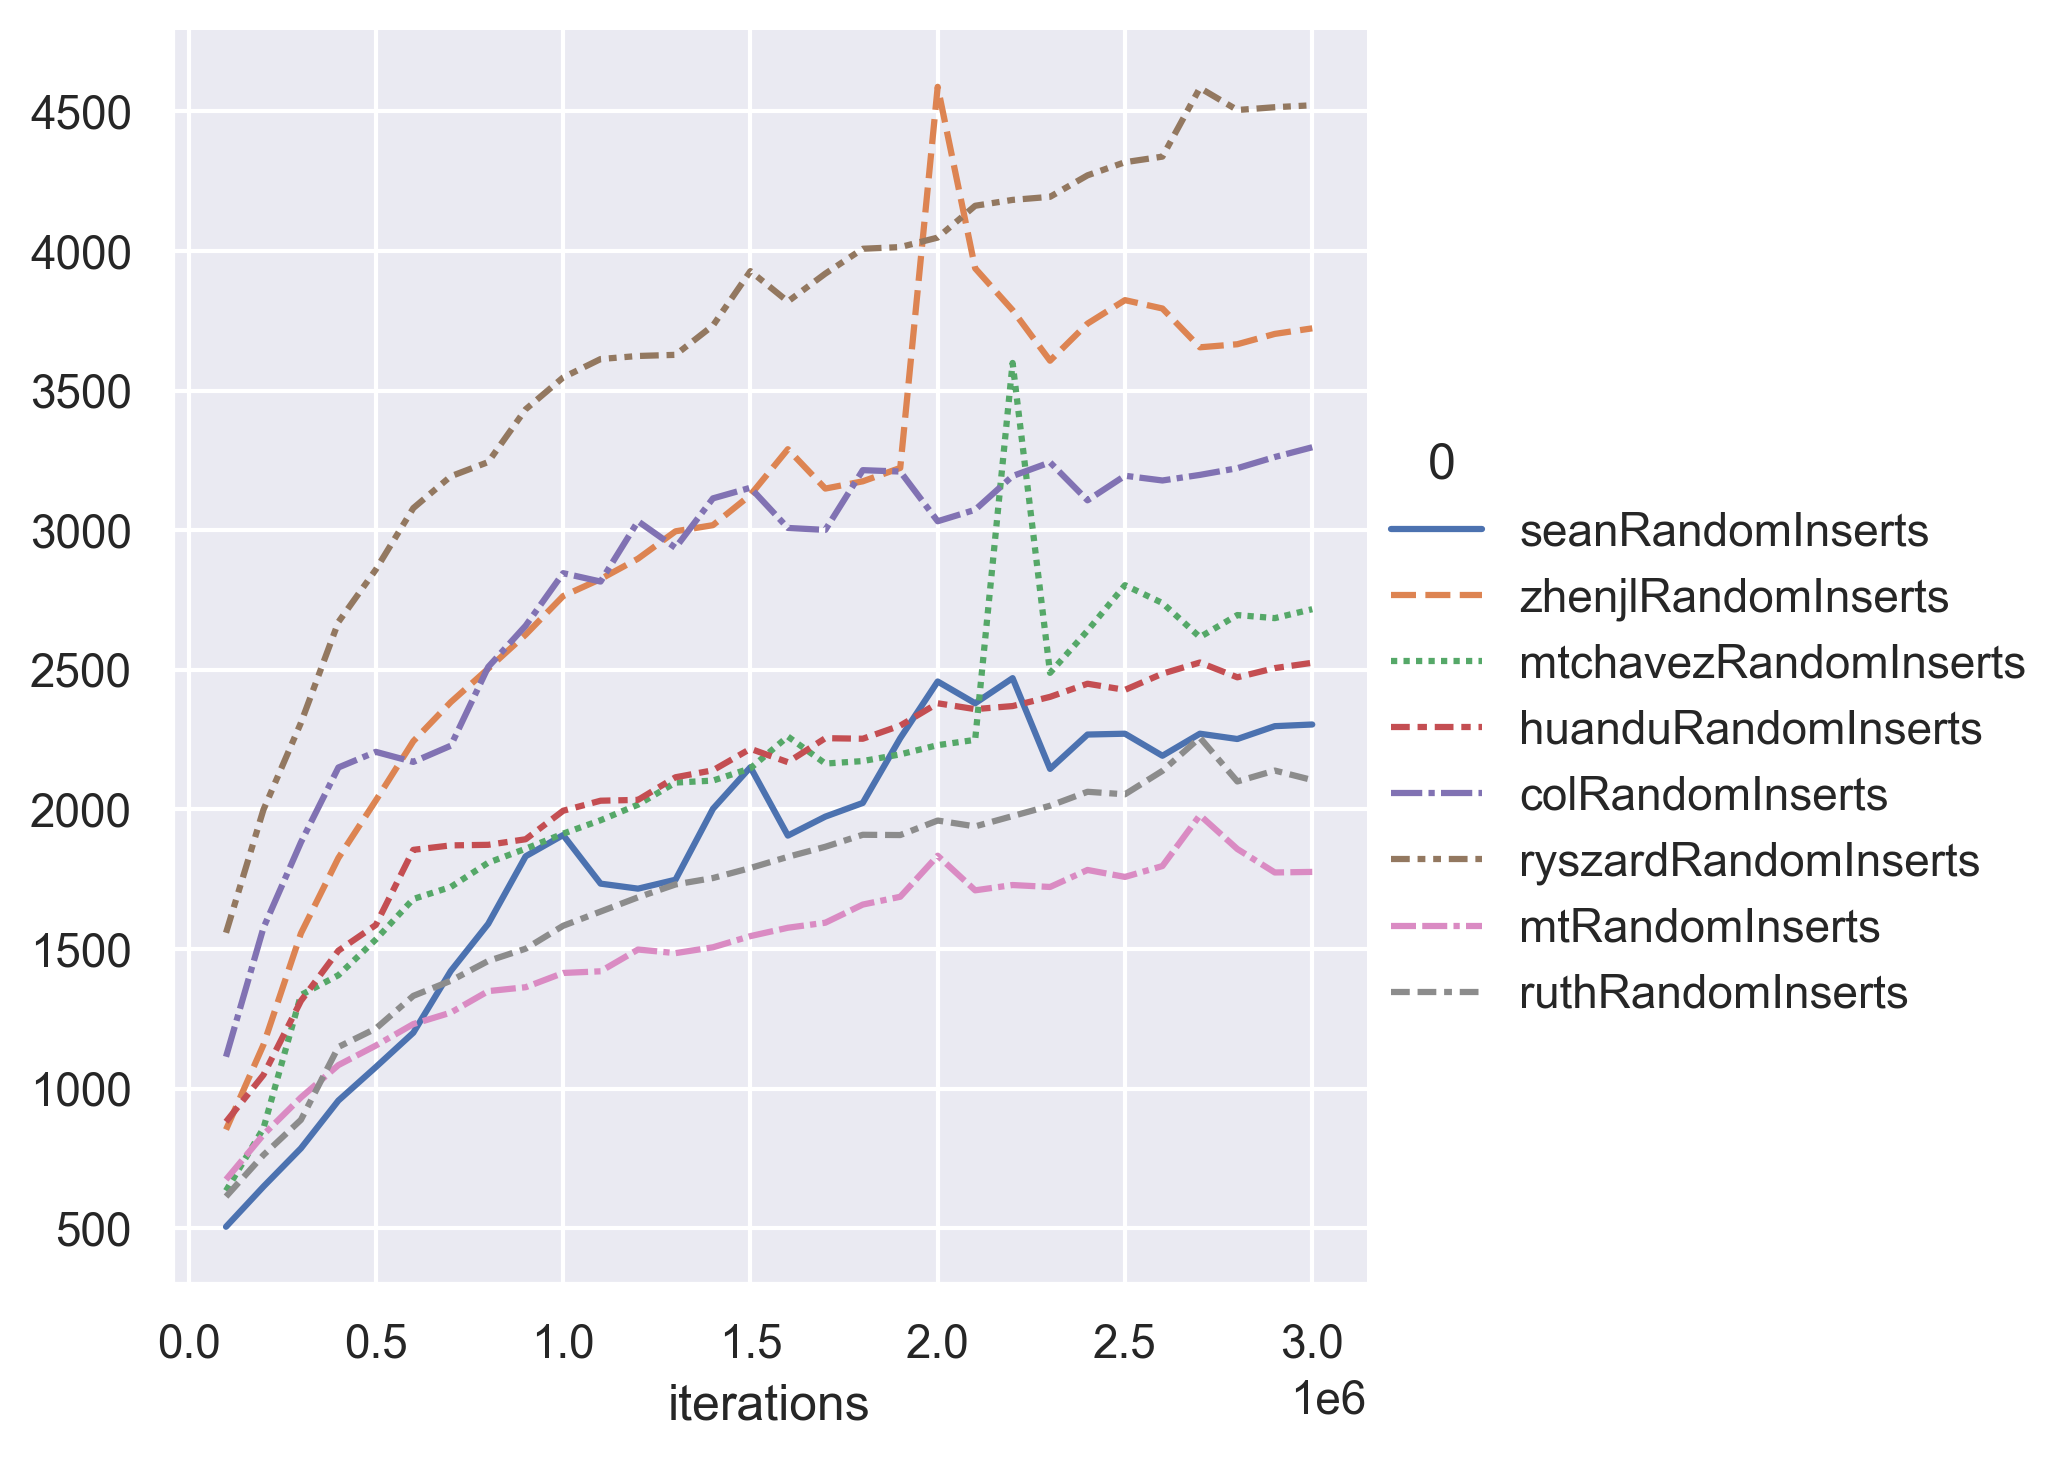

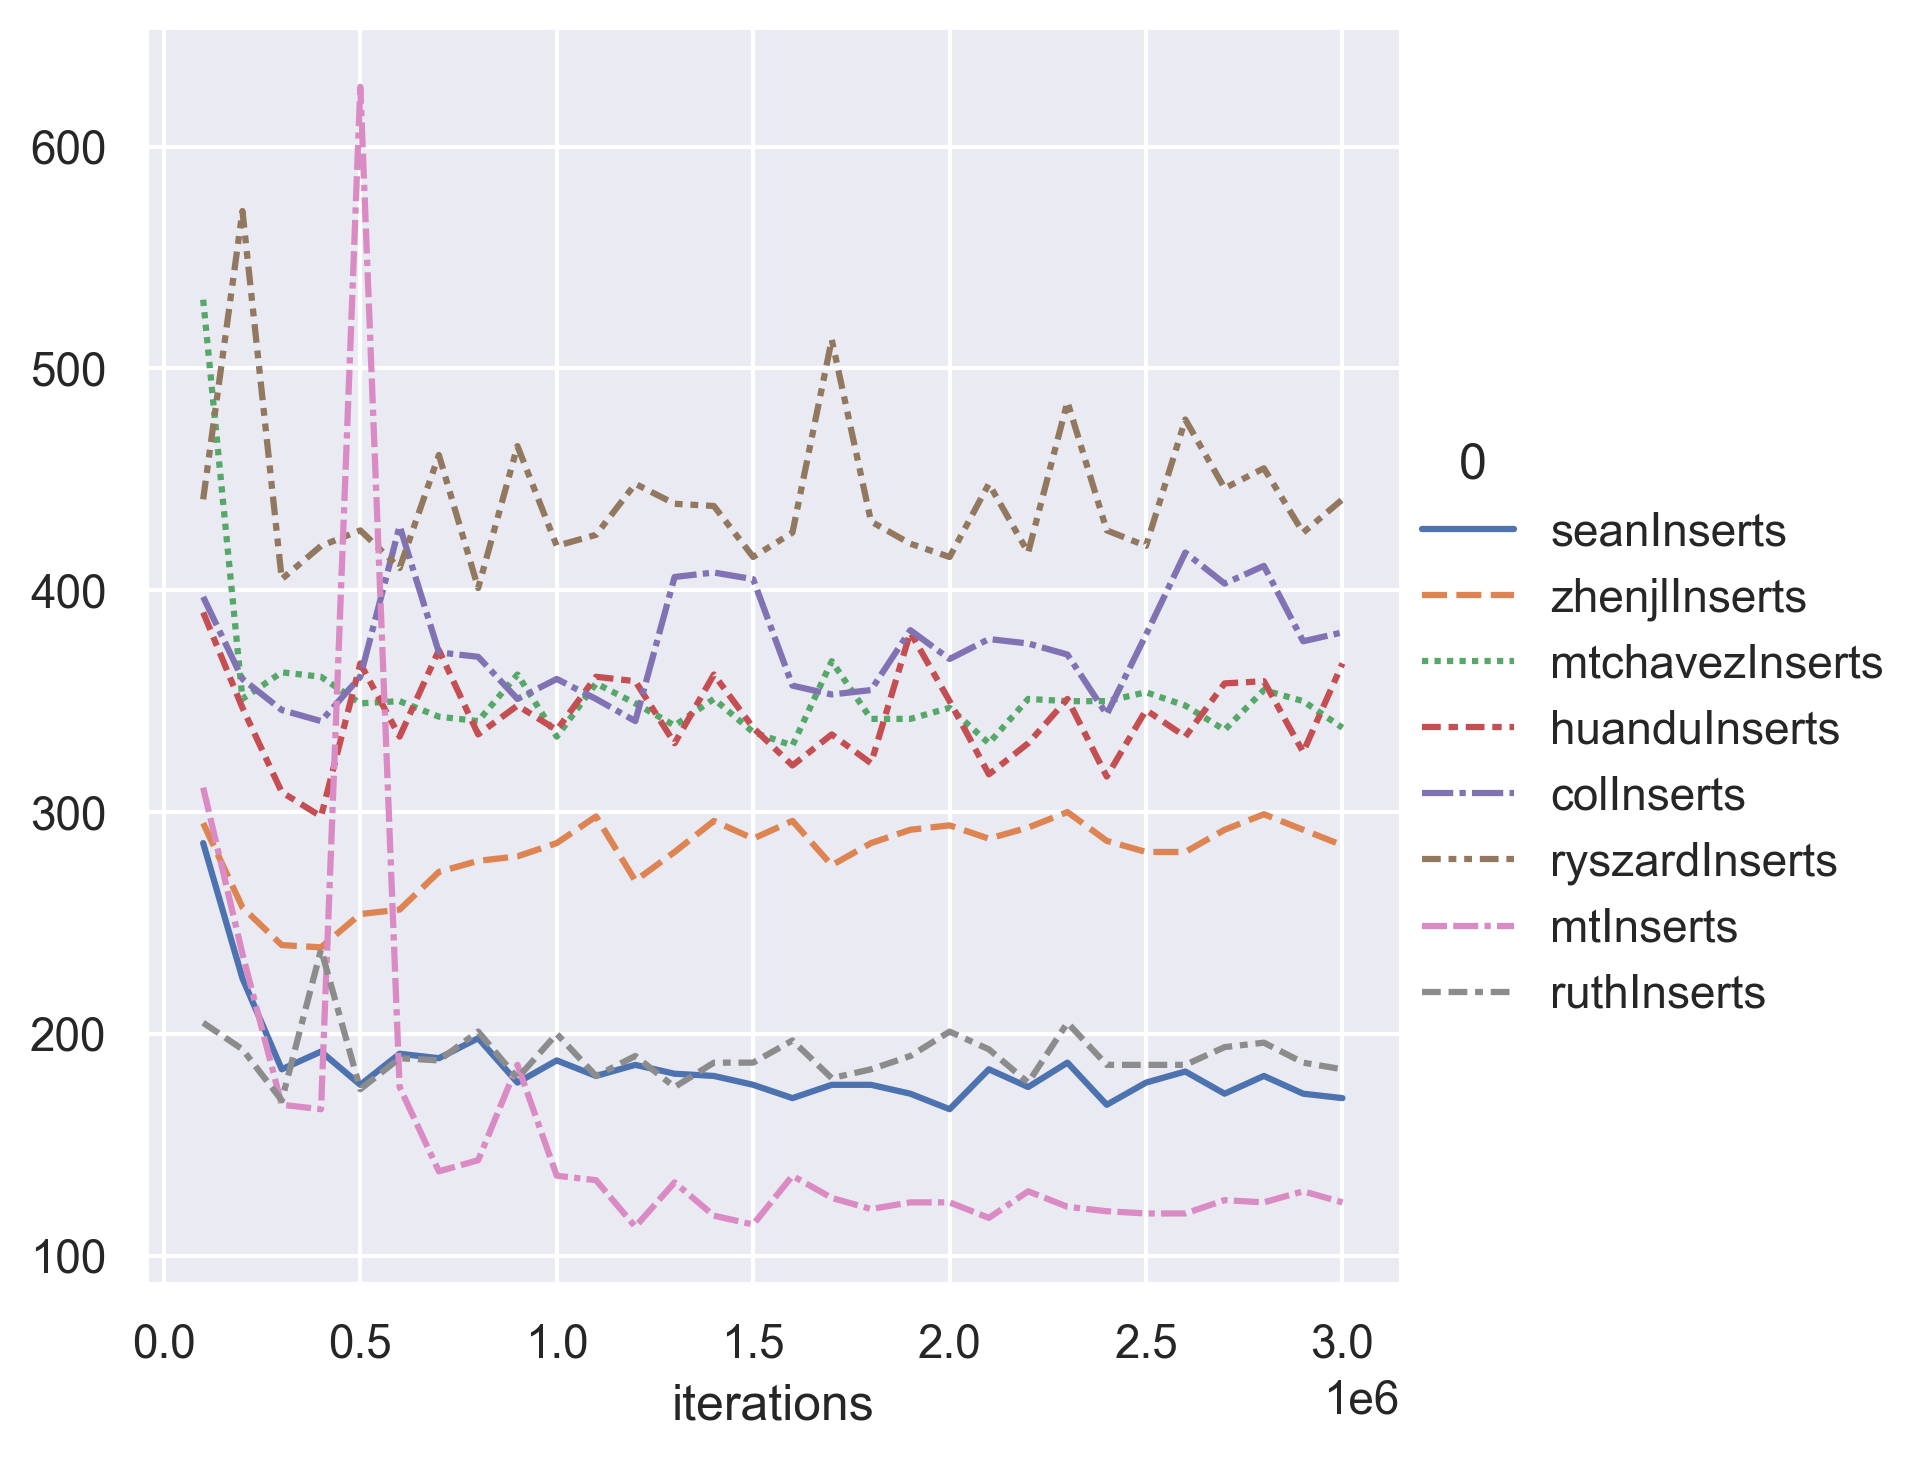

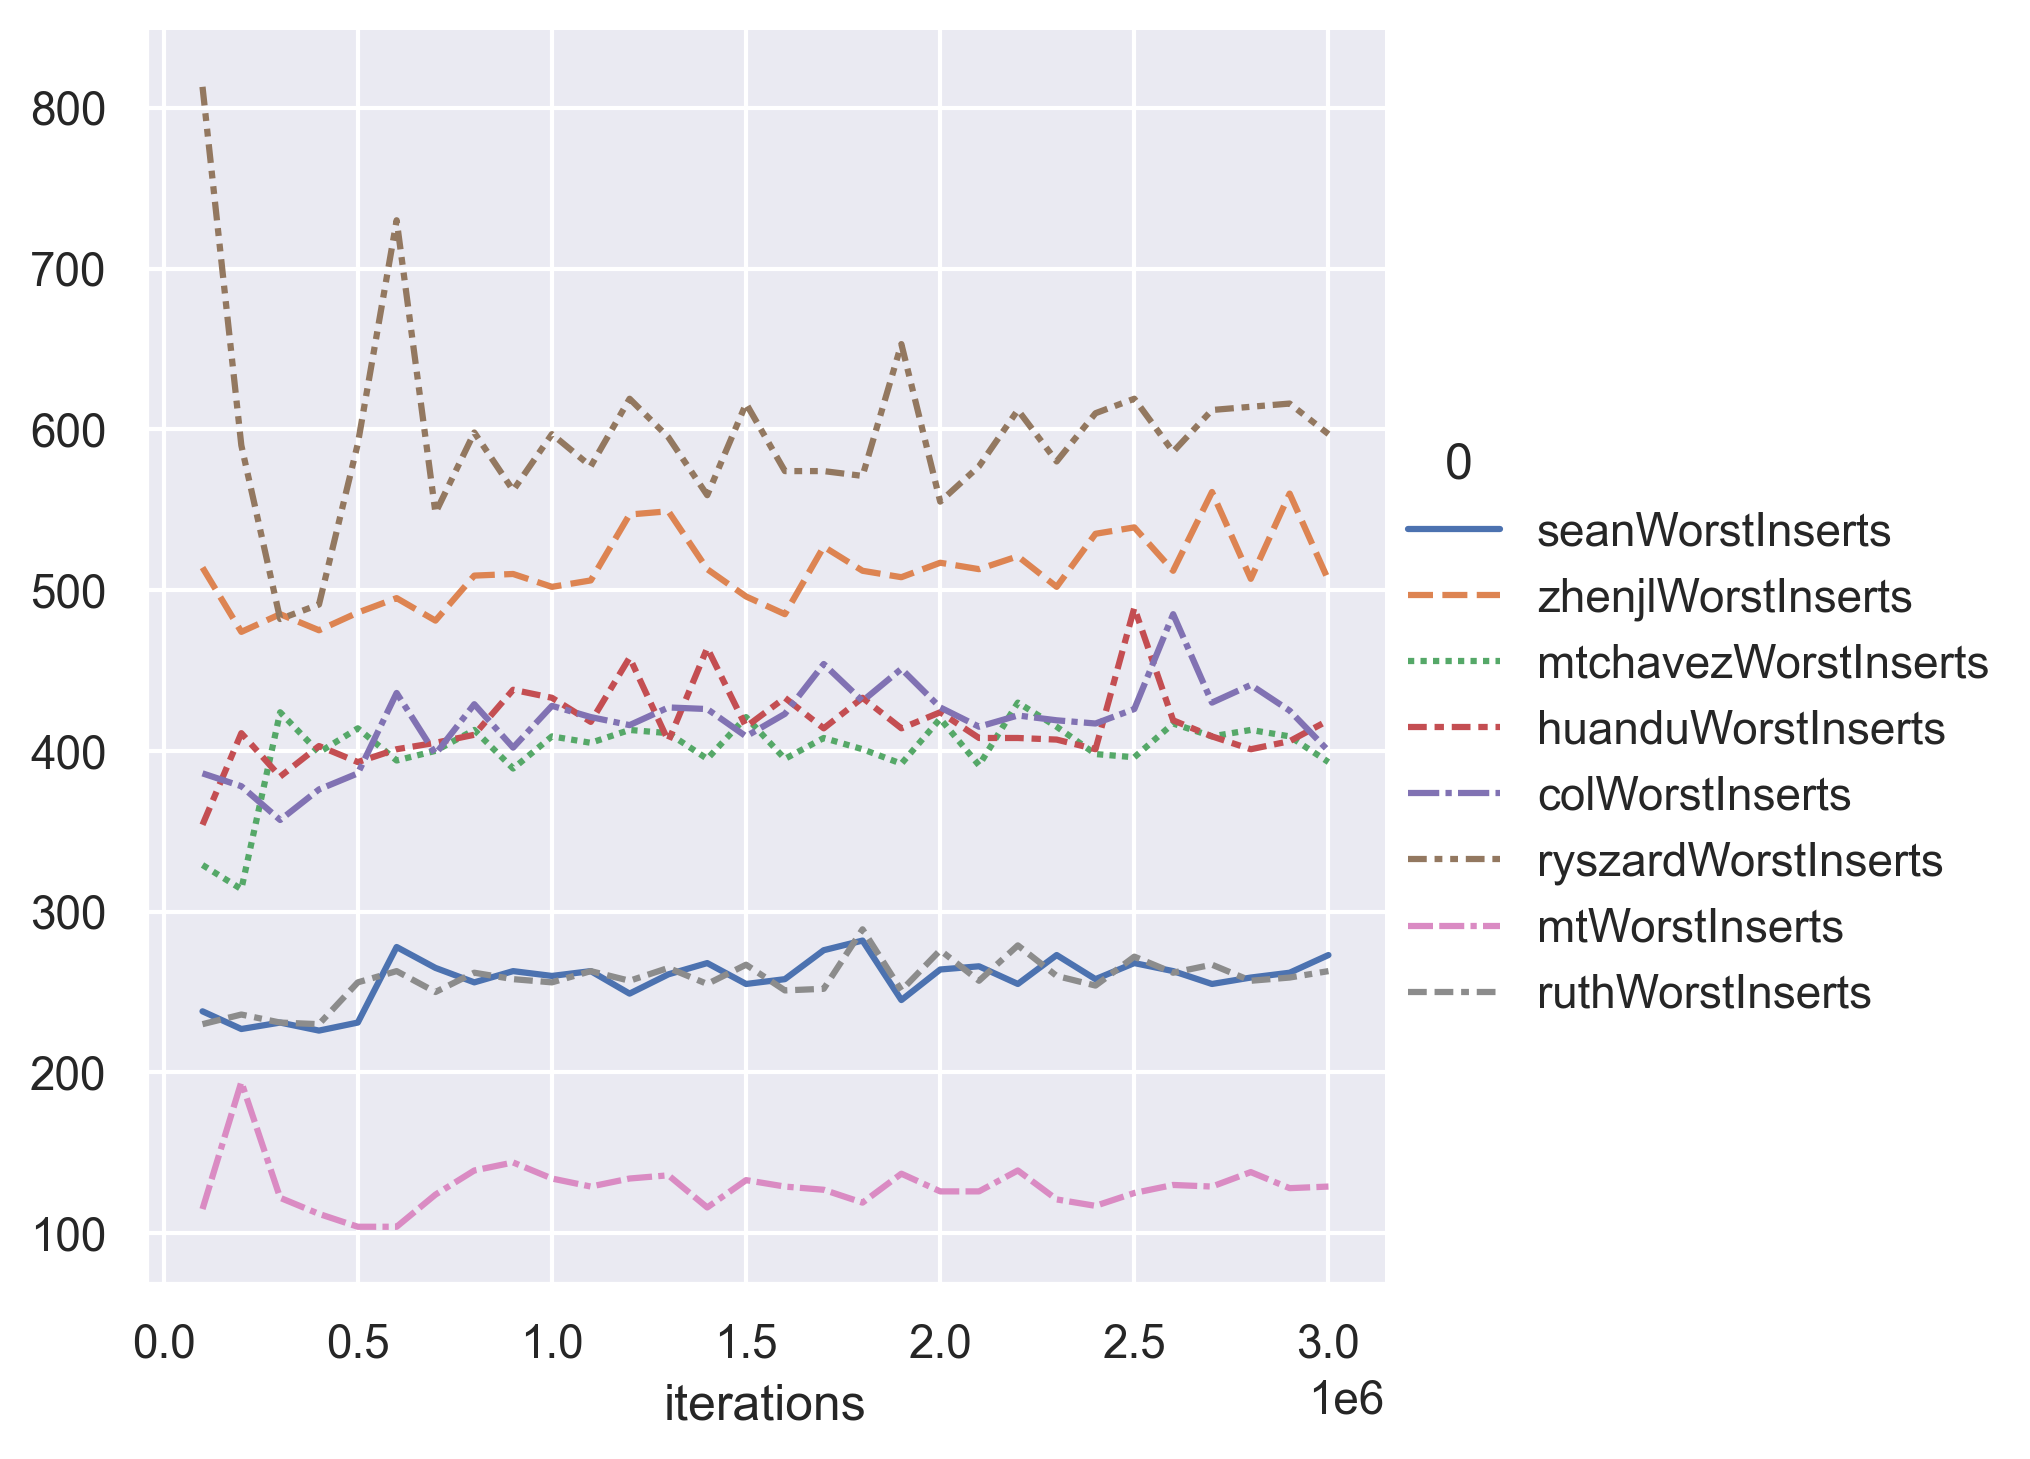

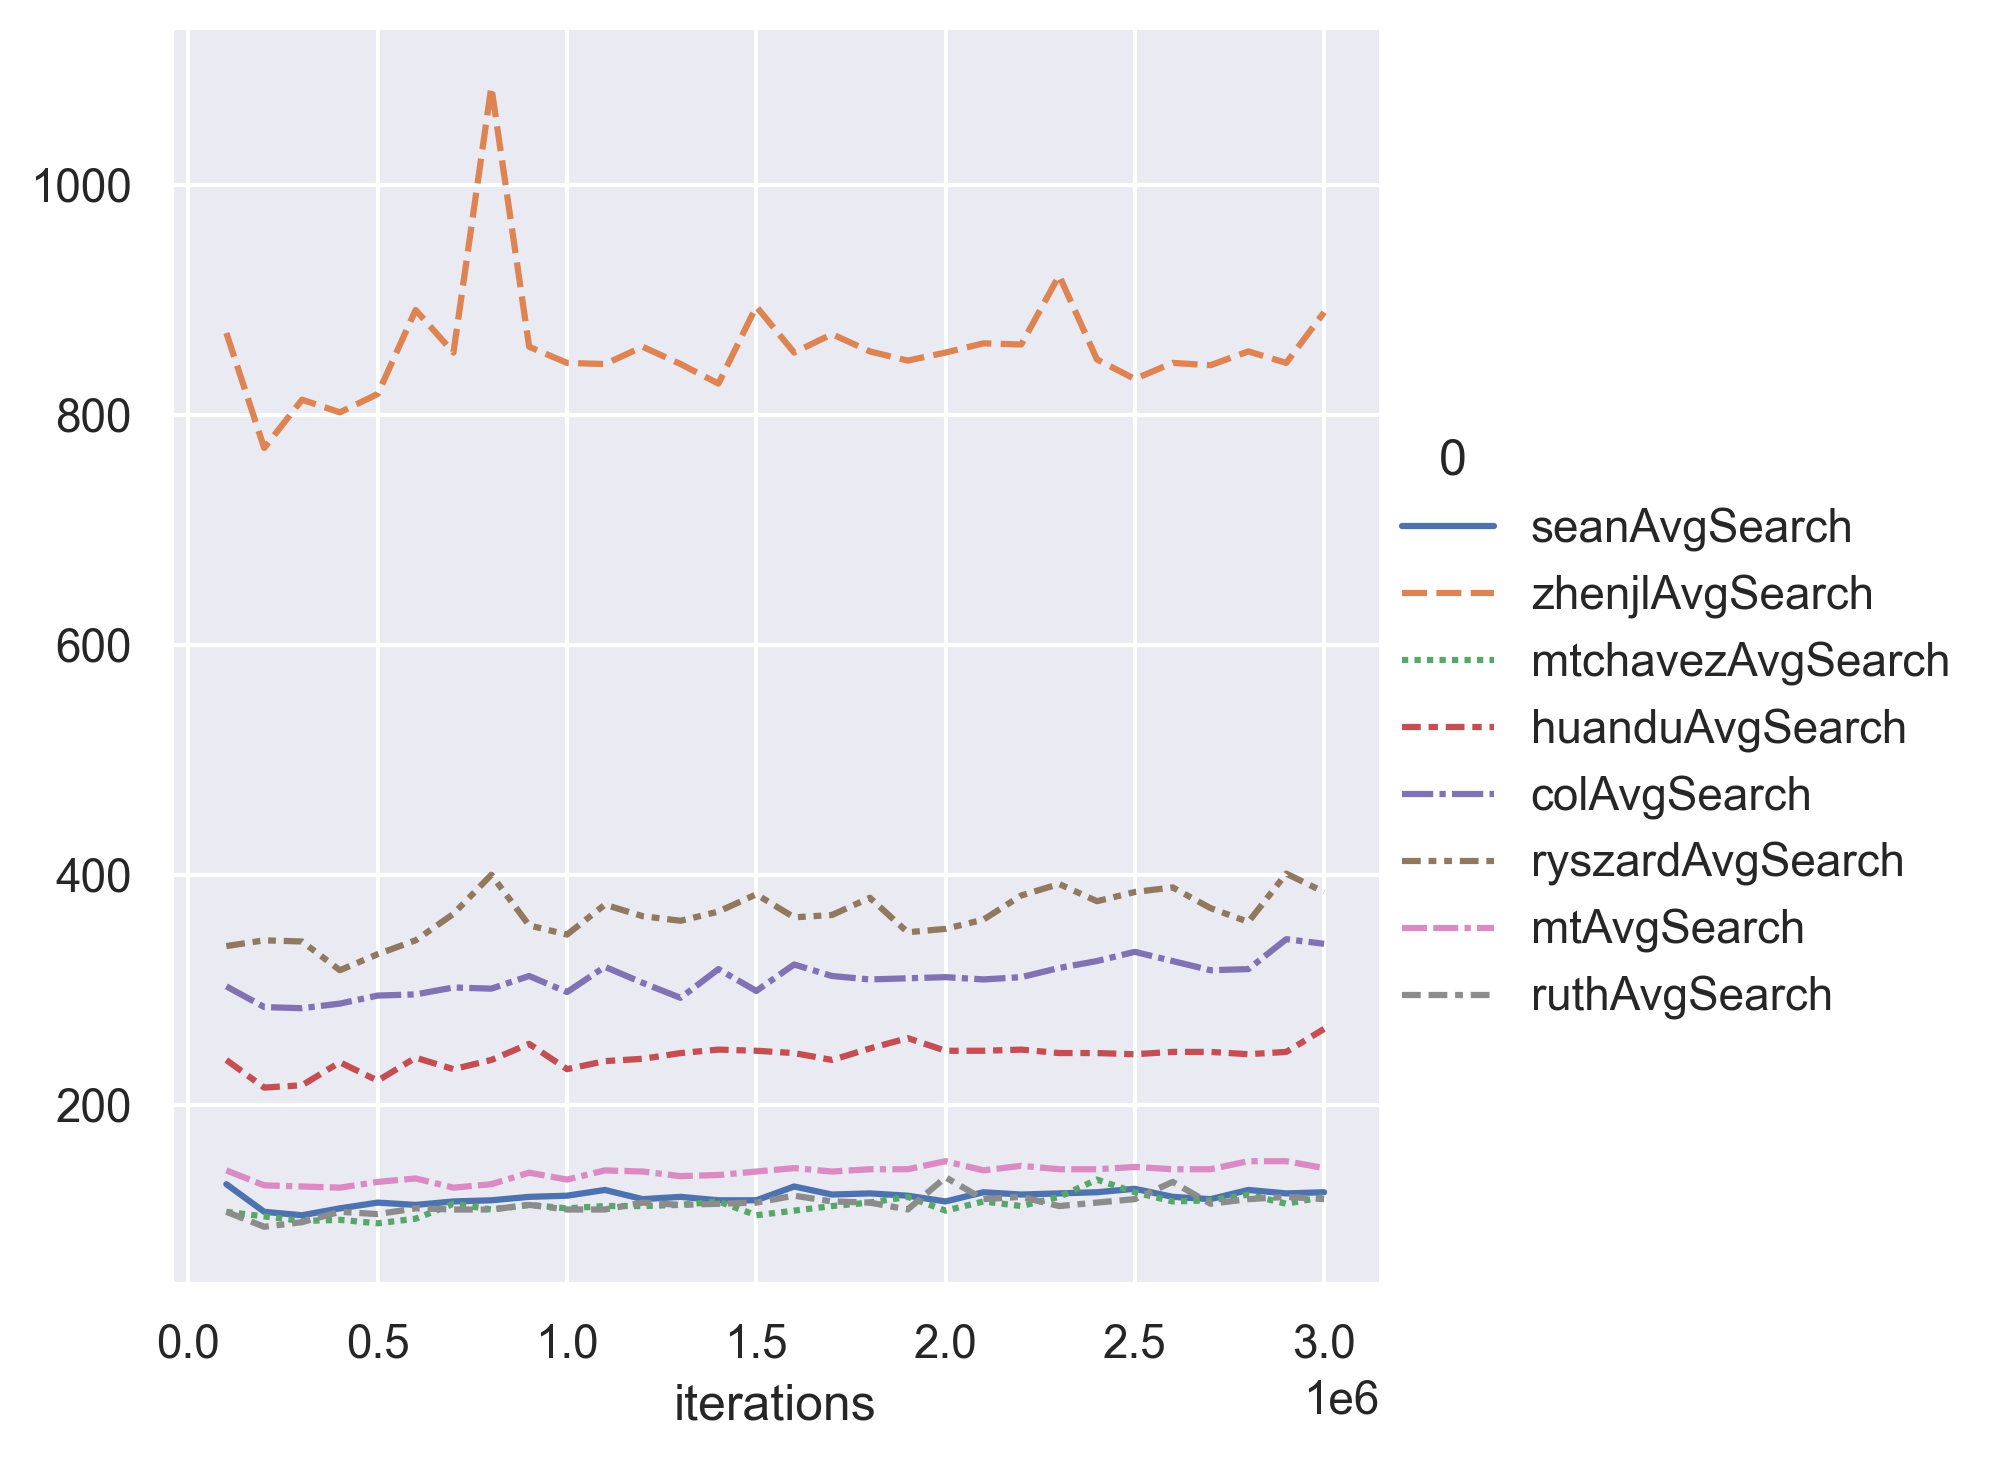

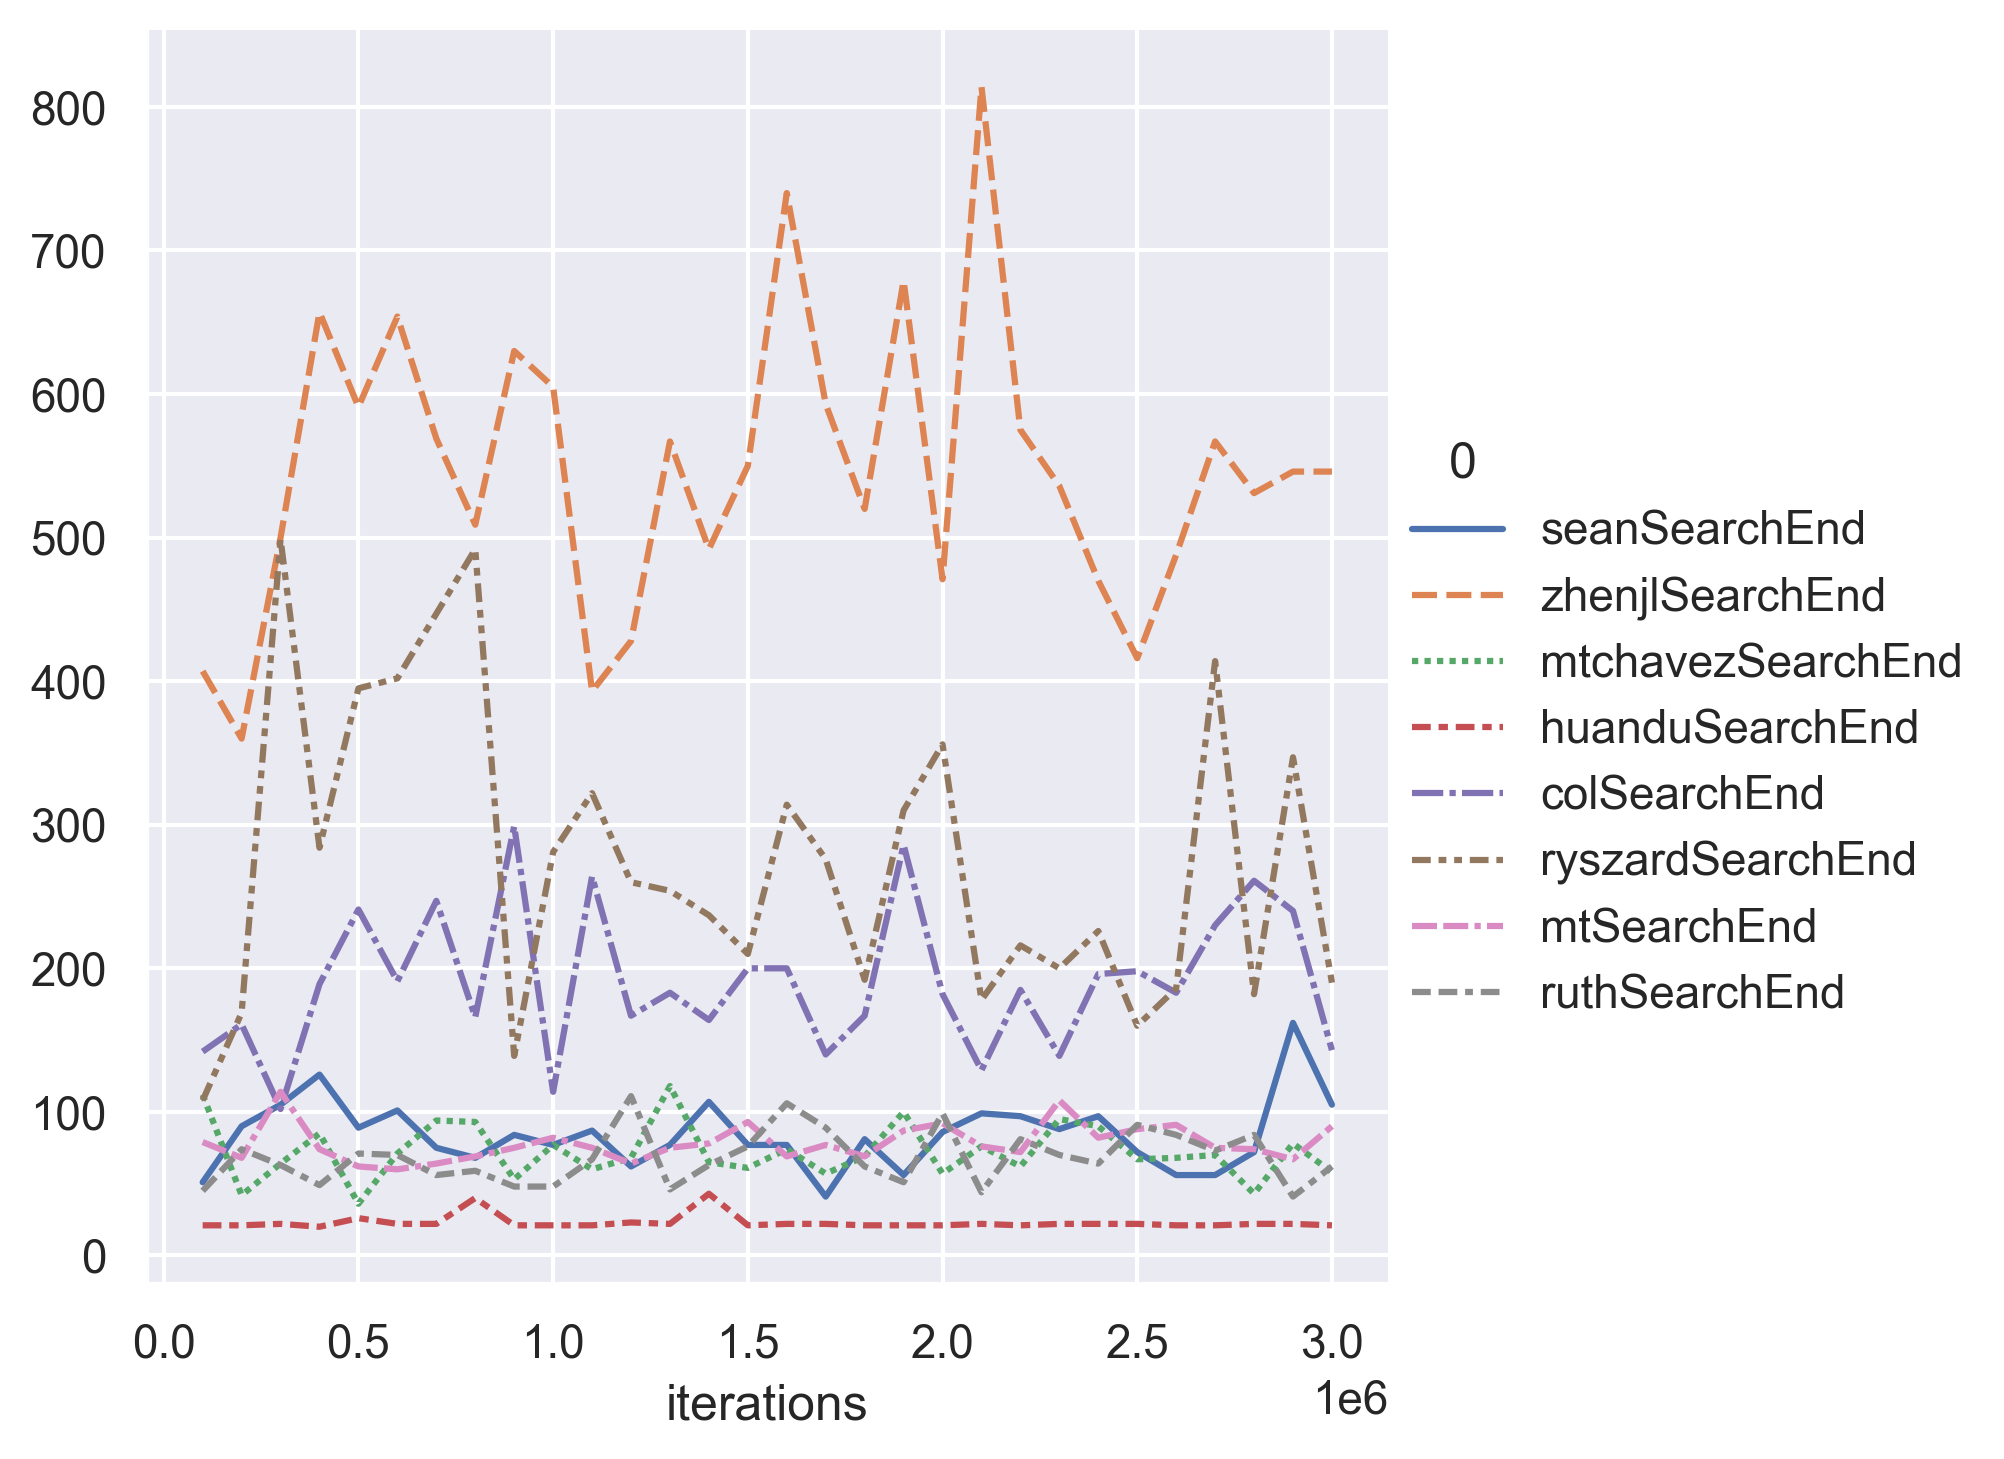

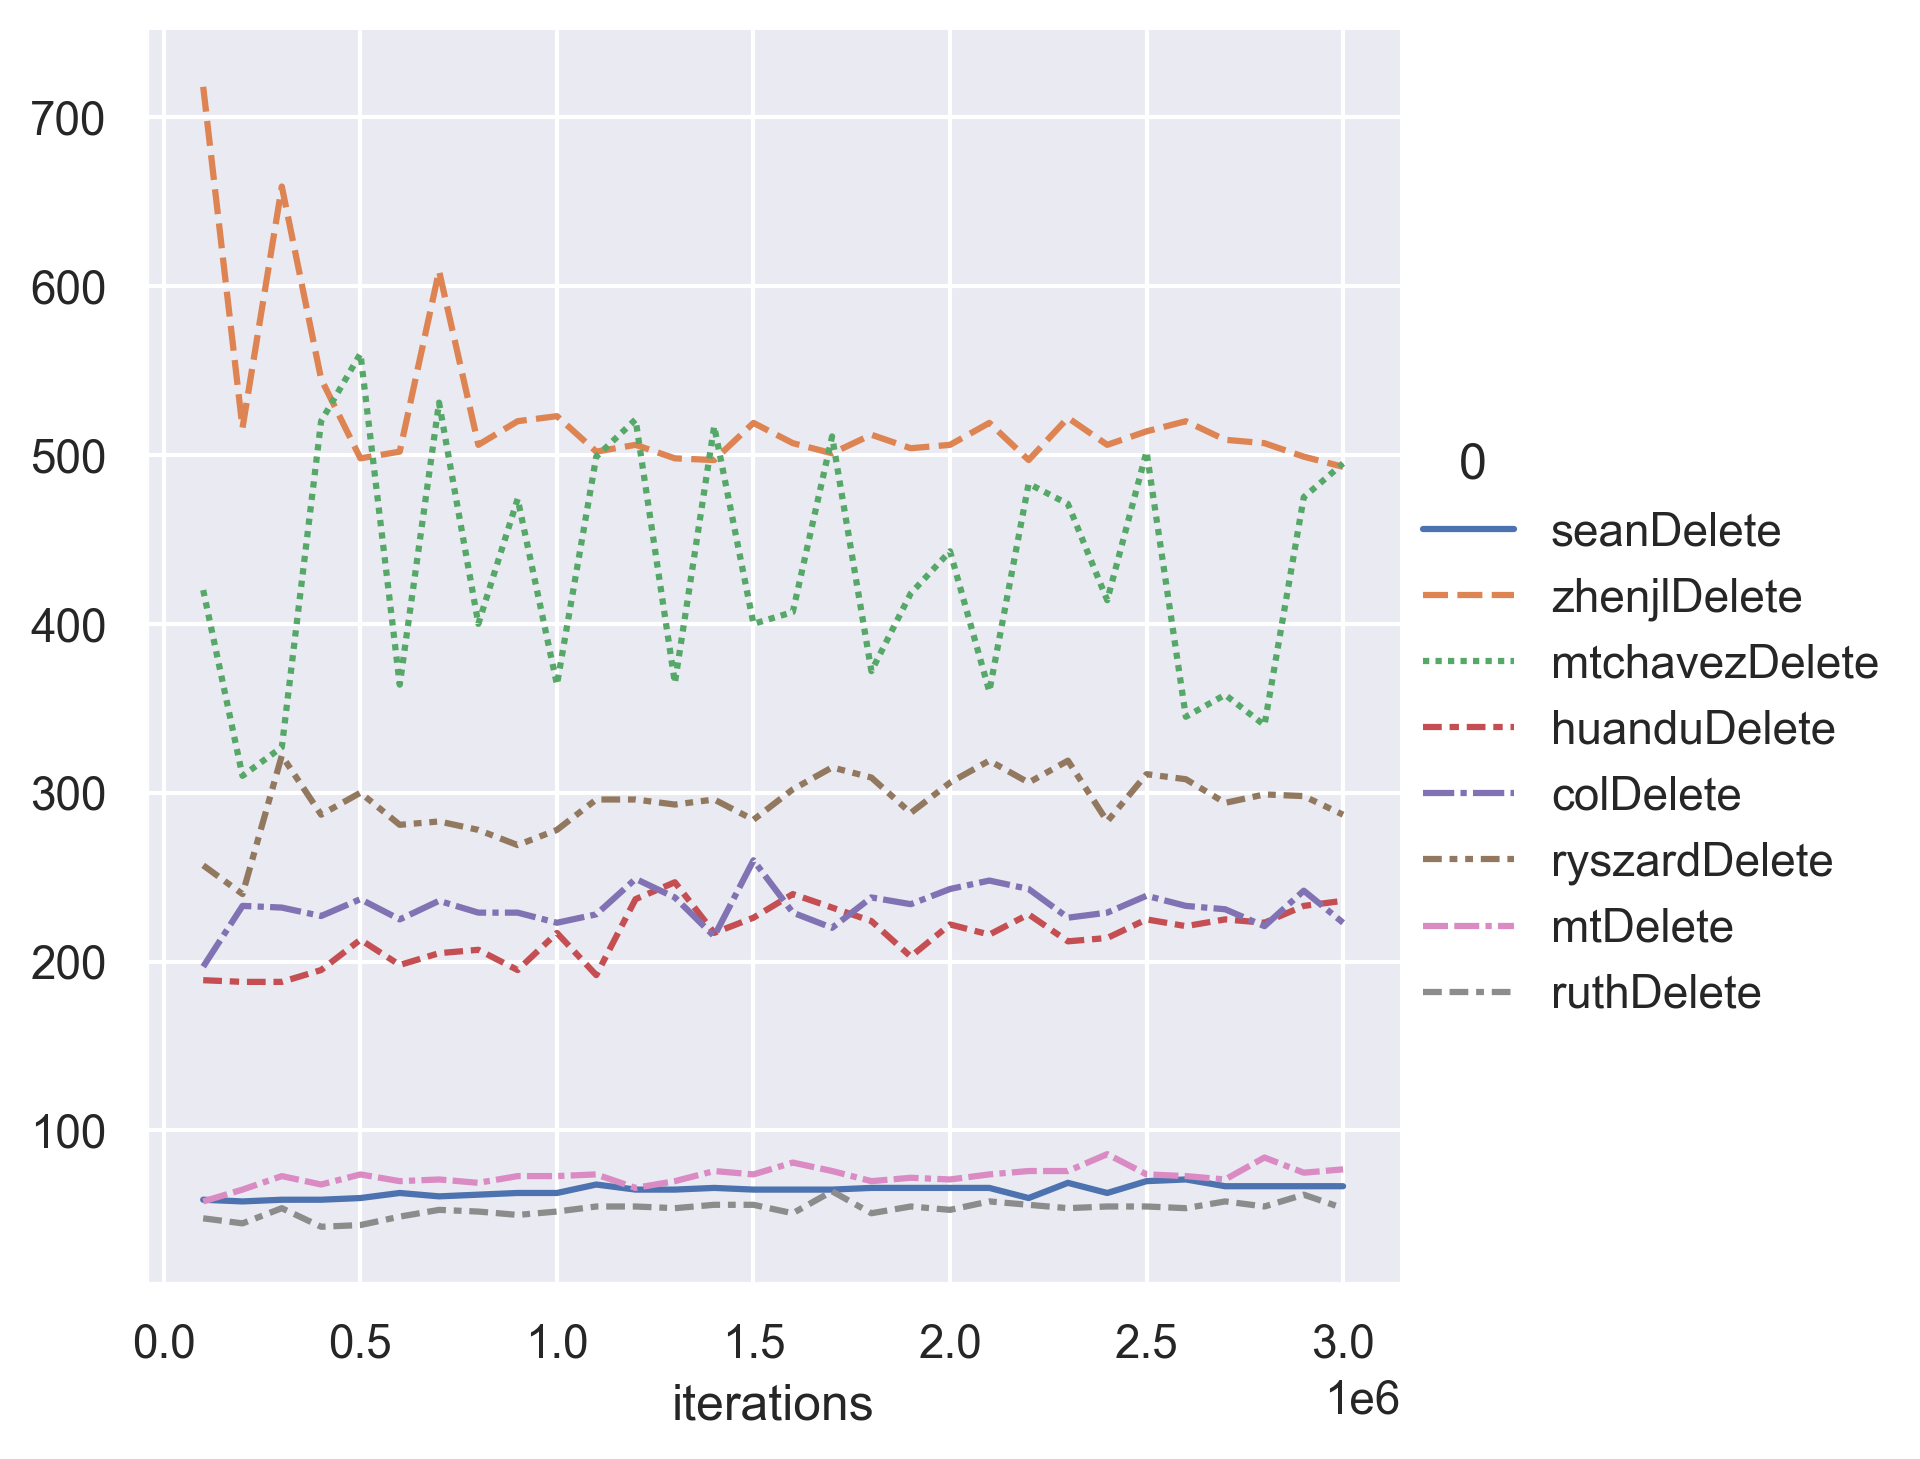

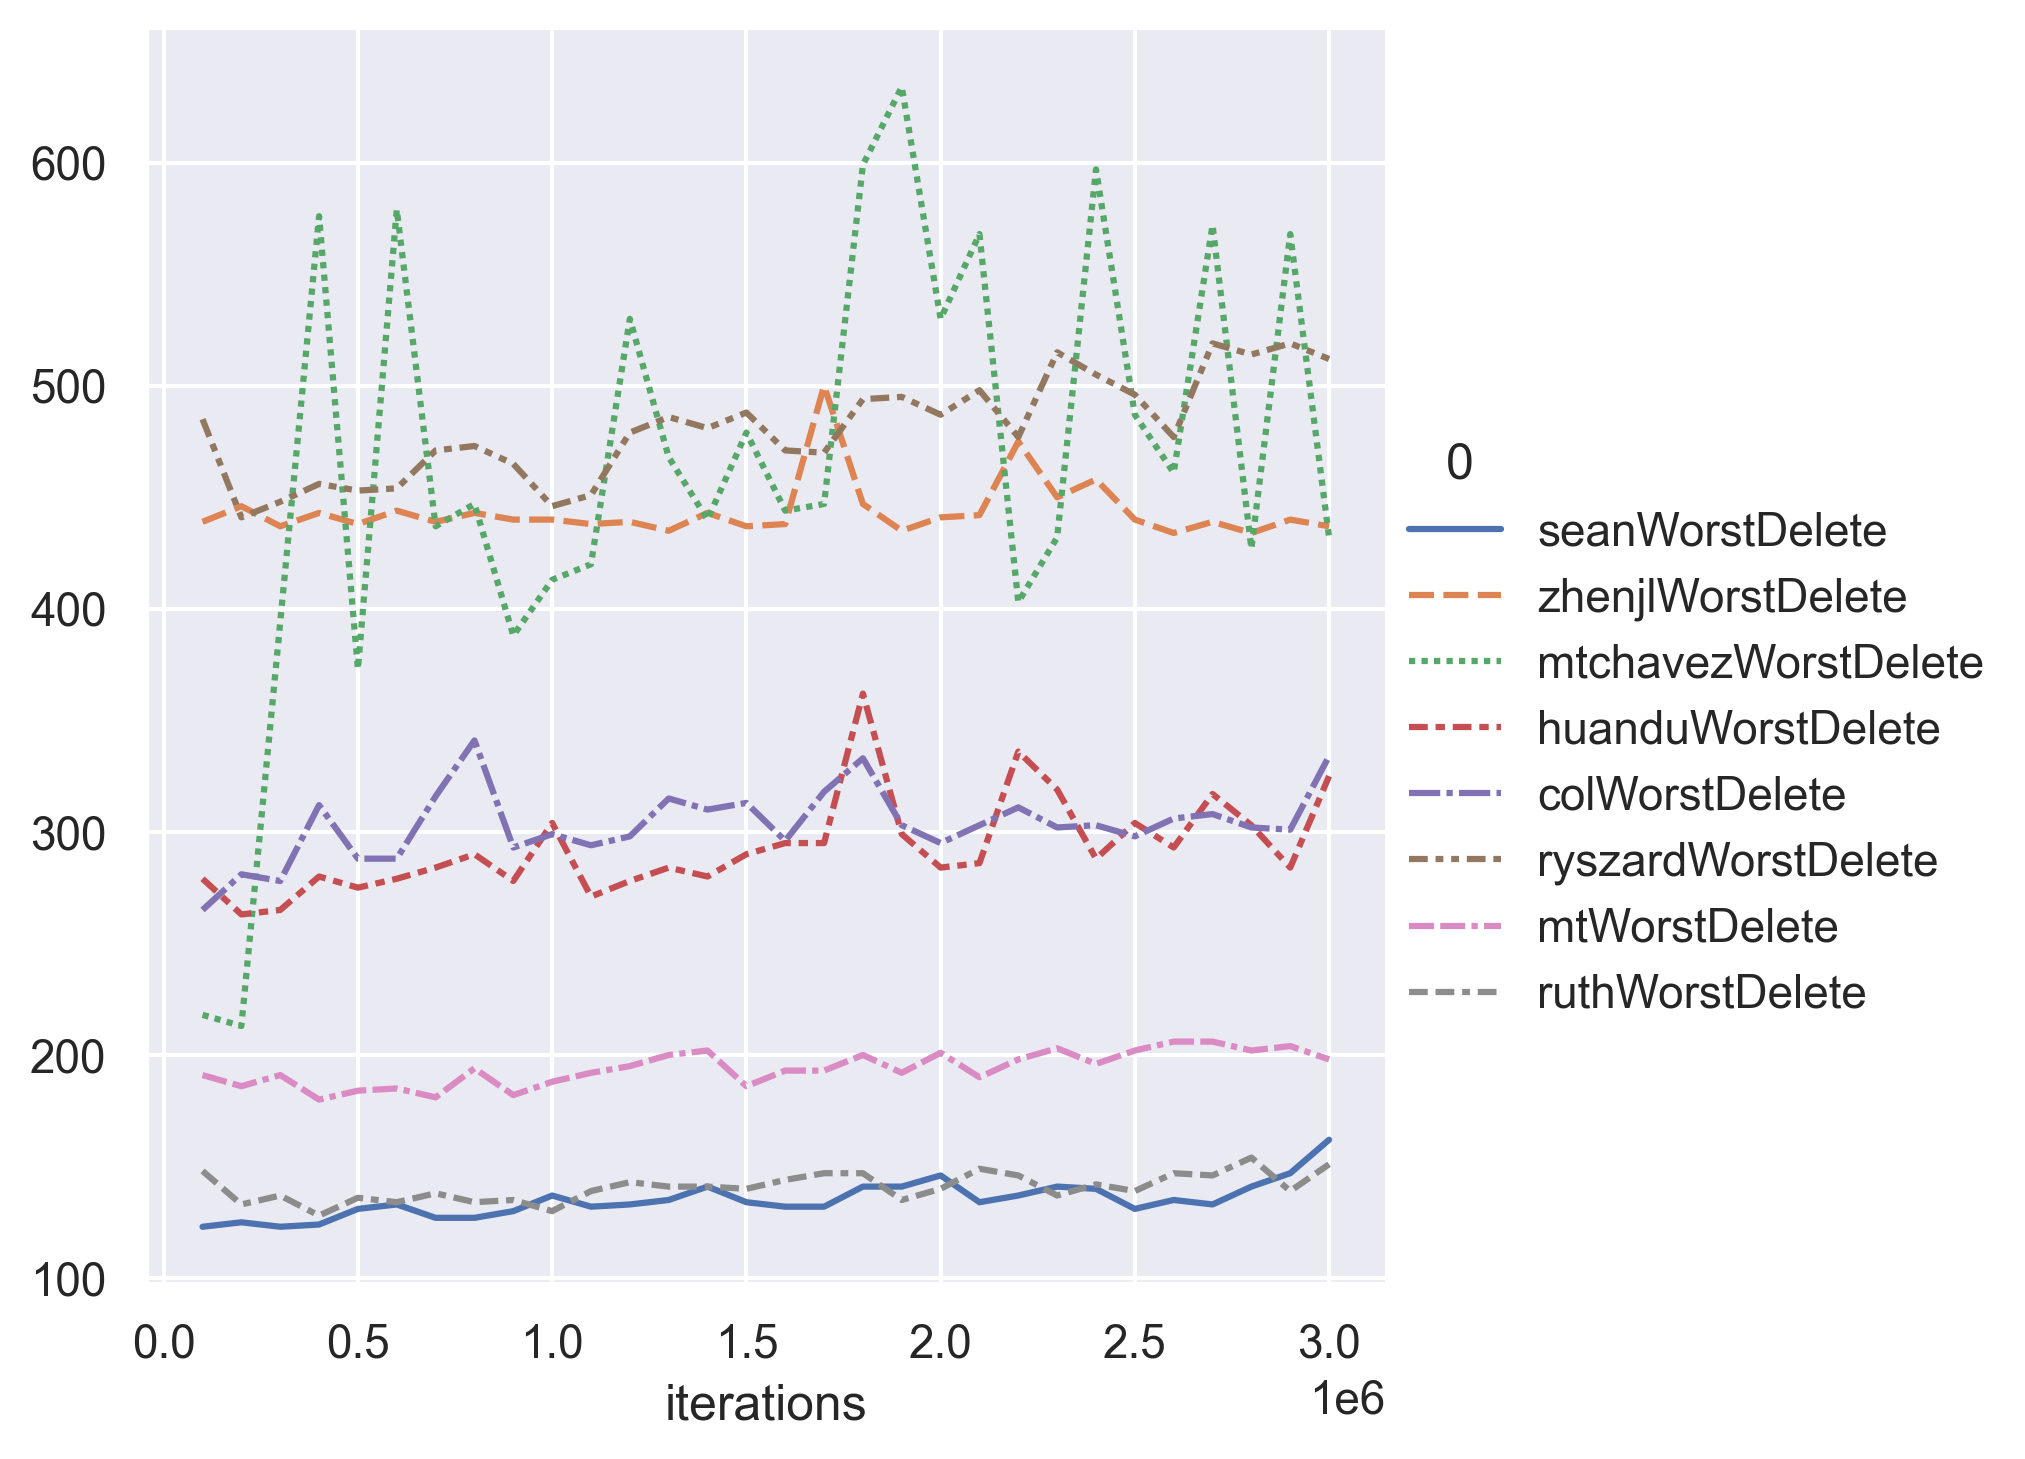

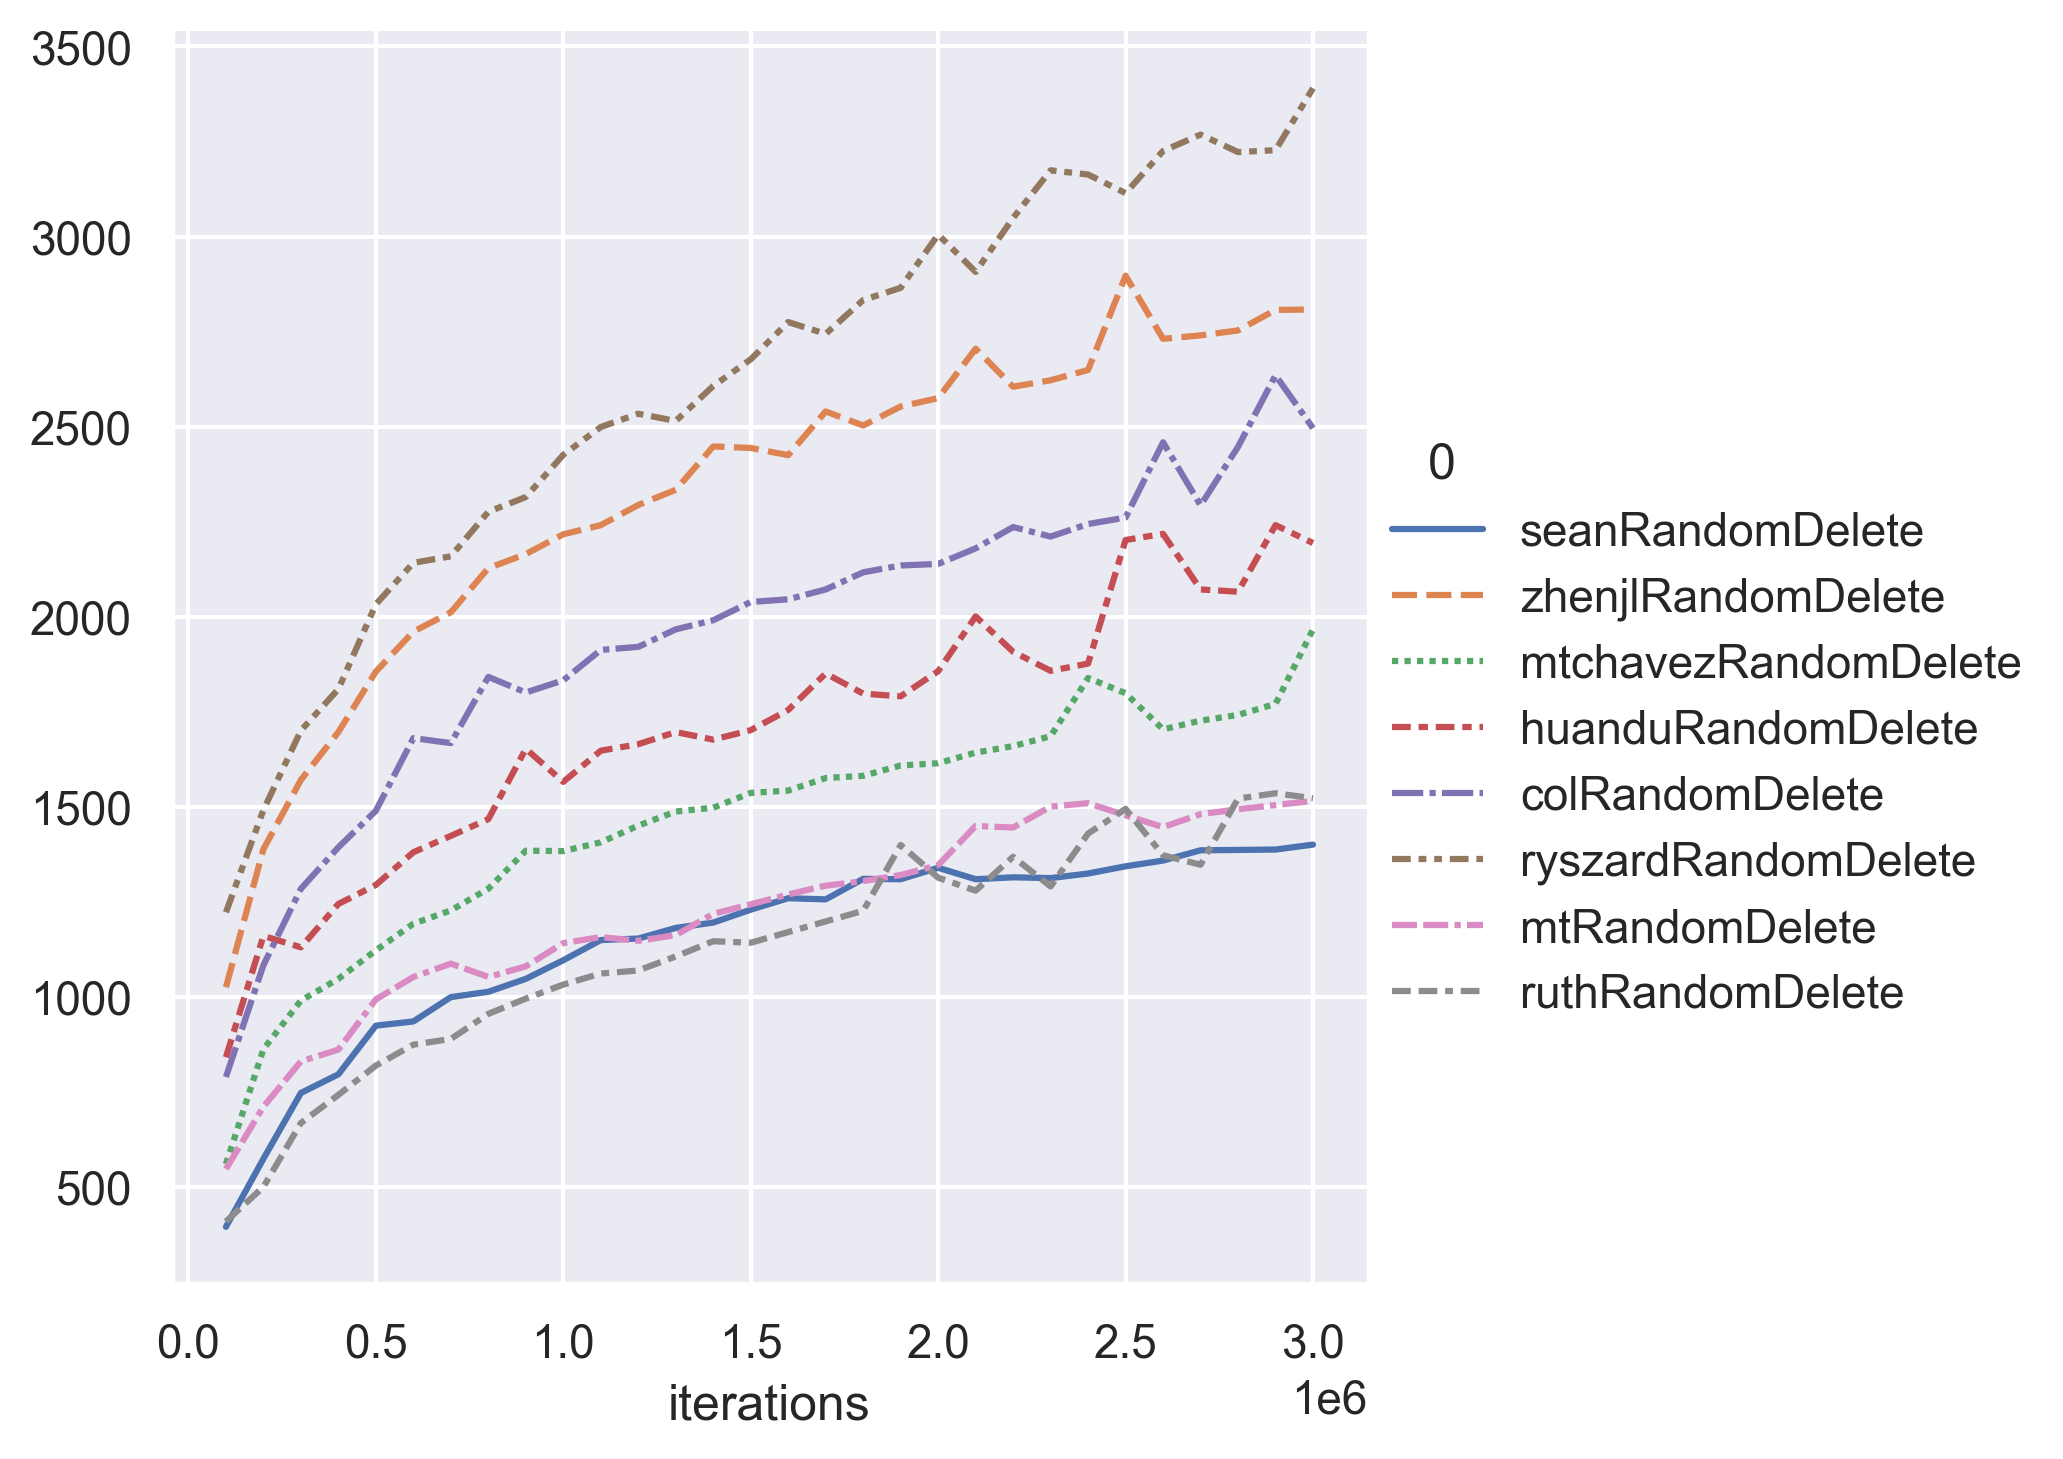

In [28]:
for key in reg:
    plot(key, reg[key])